In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
base_folder = "/data/Pein/Pytorch/Wind-Power-Prediction/res_output/"

time_folder = "24-08-25-conv_d-search"


path = base_folder + time_folder + "_result/" + time_folder + "-joined_metrics.csv"
df = pd.read_csv(path)

# Truncate values larger than 3000 to be 3000
clip_value = 100000
df["train_rmse"] = df["train_rmse"].clip(upper=clip_value)
df["val_rmse"] = df["val_rmse"].clip(upper=clip_value)
df["test_rmse"] = df["test_rmse"].clip(upper=clip_value)

# Display the first few rows of the dataframe
print(df.columns)

# remove those rows where the val_rmse and test_rmse are larger than 1000
# df = df[df["val_rmse"] <= 1000]
# df = df[df["test_rmse"] <= 1000]

# remove df where the rows values are repeated
df = df.drop_duplicates(subset=["train_rmse", "val_rmse", "test_rmse"], keep="first")


Index(['exp_date', 'train_rmse', 'train_custom_acc', 'val_rmse_for_best_train',
       'val_custom_acc_for_best_train', 'test_rmse_for_best_train',
       'test_custom_acc_for_best_train', 'train_epoch_for_best_train',
       'val_rmse', 'val_custom_acc', 'train_rmse_for_best_val',
       'train_custom_acc_for_best_val', 'test_rmse_for_best_val',
       'test_custom_acc_for_best_val', 'val_epoch_for_best_val', 'test_rmse',
       'test_custom_acc', 'train_rmse_for_best_test',
       'train_custom_acc_for_best_test', 'val_rmse_for_best_test',
       'val_custom_acc_for_best_test', 'test_epoch_for_best_test', 'v_splt',
       'y_ord', 'd', 'hd', 'ld', 'tok_d', 'time_d', 'pos_d', 'lyrs', 'n_heads',
       'conv_d', 'tok_kern', 'feat_kern', 'norm_typ', 'skp_mod', 'use_pos_enc',
       'seq_len', 'mlp_norm', 'ep', 'bs', 'lr', 'dp', 'w_decay'],
      dtype='object')


In [21]:
import math


def plot_rmse_effects(
    df, x, y=["train_custom_acc", "val_custom_acc", "test_custom_acc"]
):
    for rmse in y:
        # Calculate the grid size
        num_features = len(x)
        num_rows = math.ceil(num_features / 3)  # Number of rows required
        num_cols = min(3, num_features)  # Number of columns (max 3)

        # Create subplots with the calculated grid size
        fig, axes = plt.subplots(
            num_rows, num_cols, figsize=(6 * num_cols, 6 * num_rows)
        )

        # Flatten axes array if there's more than one row
        if num_rows > 1:
            axes = axes.flatten()
        else:
            axes = [axes]  # Wrap single row axes in a list

        for i, feature in enumerate(x):
            sns.boxplot(ax=axes[i], x=feature, y=rmse, data=df)
            for label in axes[i].get_xticklabels():
                label.set_rotation(45)

        # Remove any empty subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        # Adjust layout to make sure plots are not overlapping
        plt.tight_layout()
        plt.show()

Available features to plot: ['y_ord', 'w_decay', 'mlp_norm', 'seq_len', 'ep', 'lr', 'd', 'hd', 'ld', 'tok_d', 'time_d', 'pos_d', 'lyrs', 'tok_kern', 'conv_d', 'feat_kern', 'dp', 'norm_typ', 'n_heads', 'use_pos_enc', 'skp_mod', 'bs', 'ep']


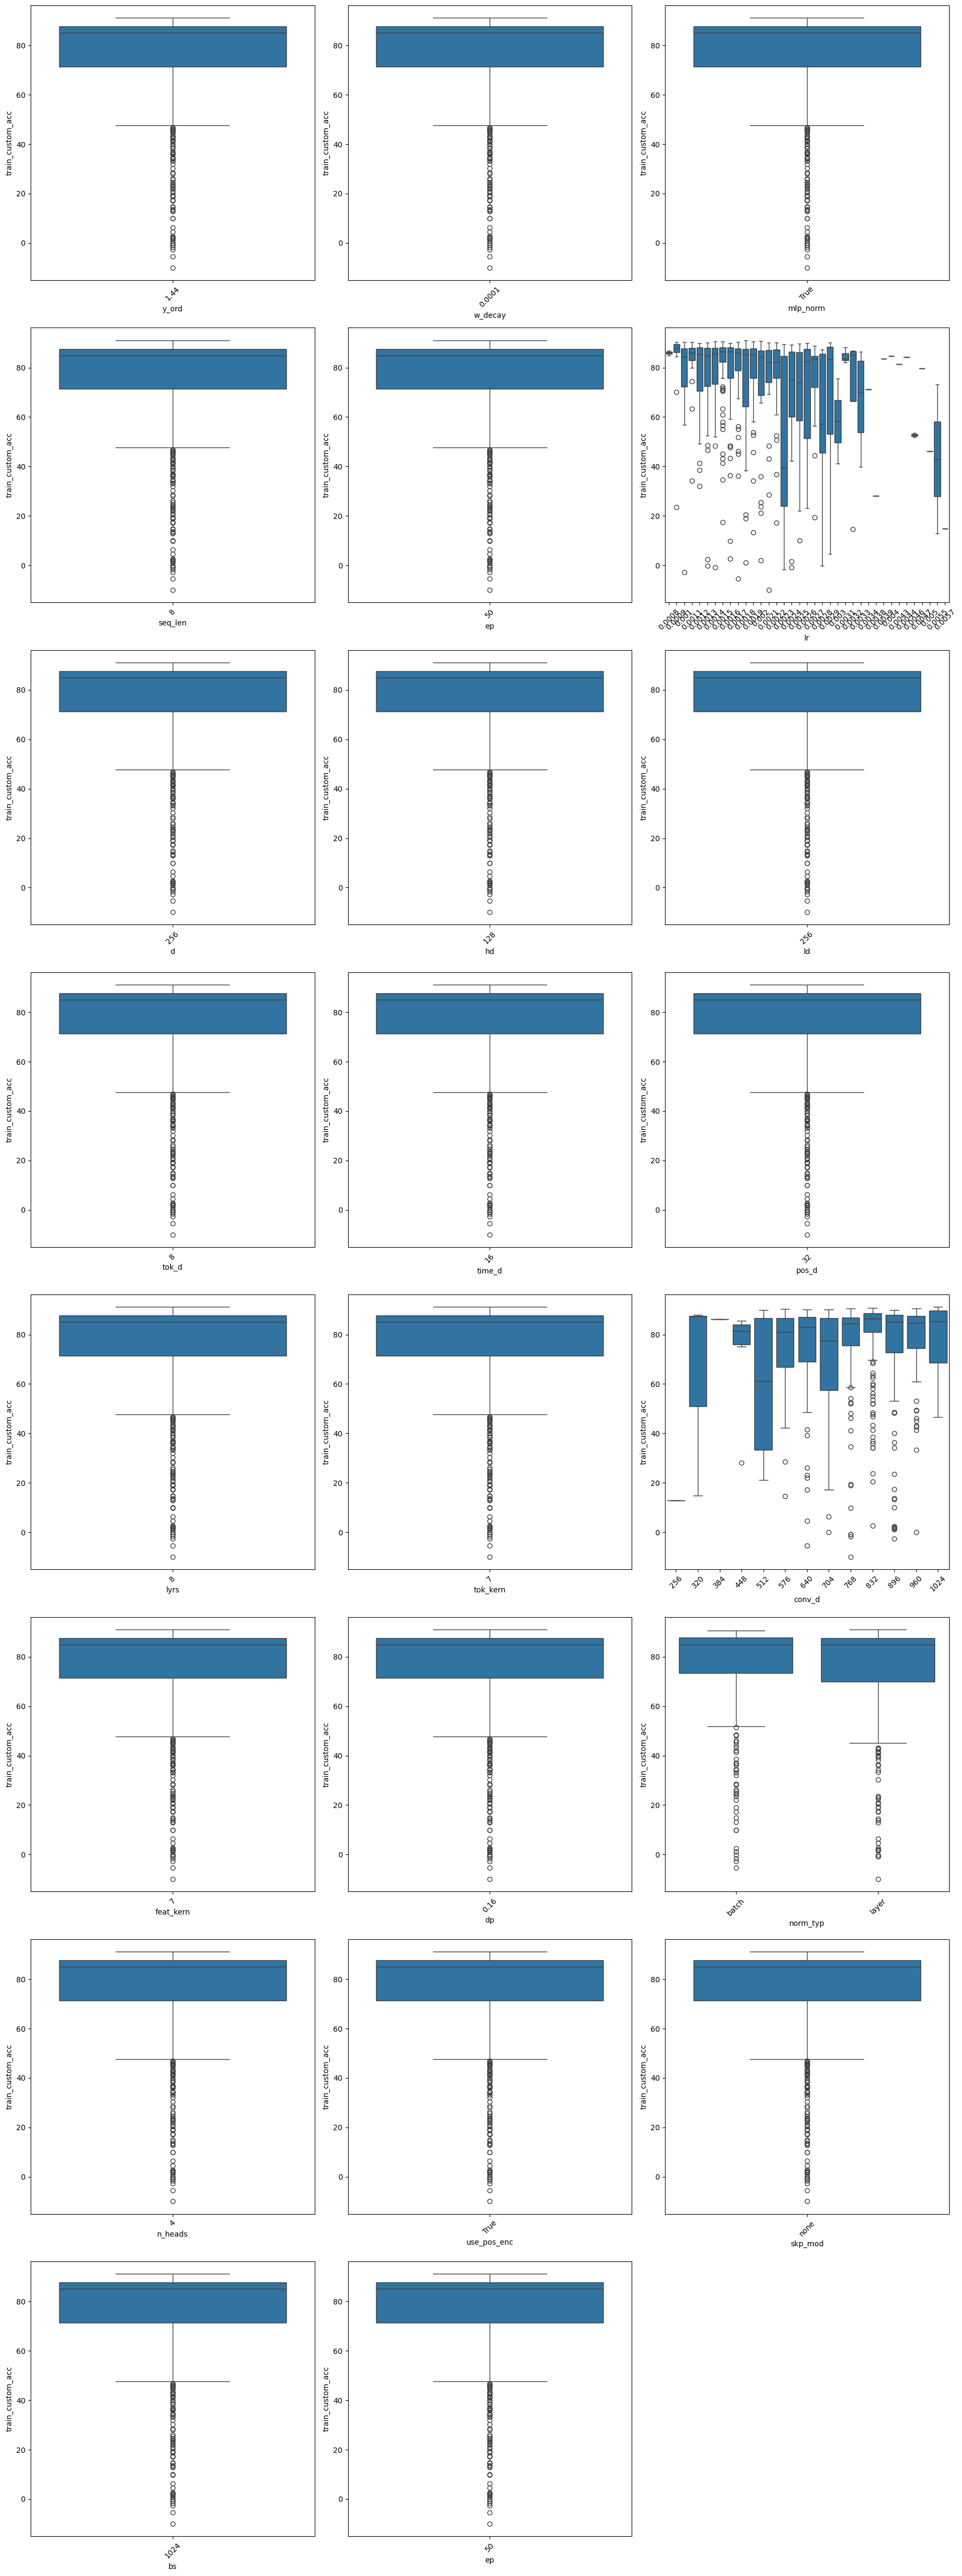

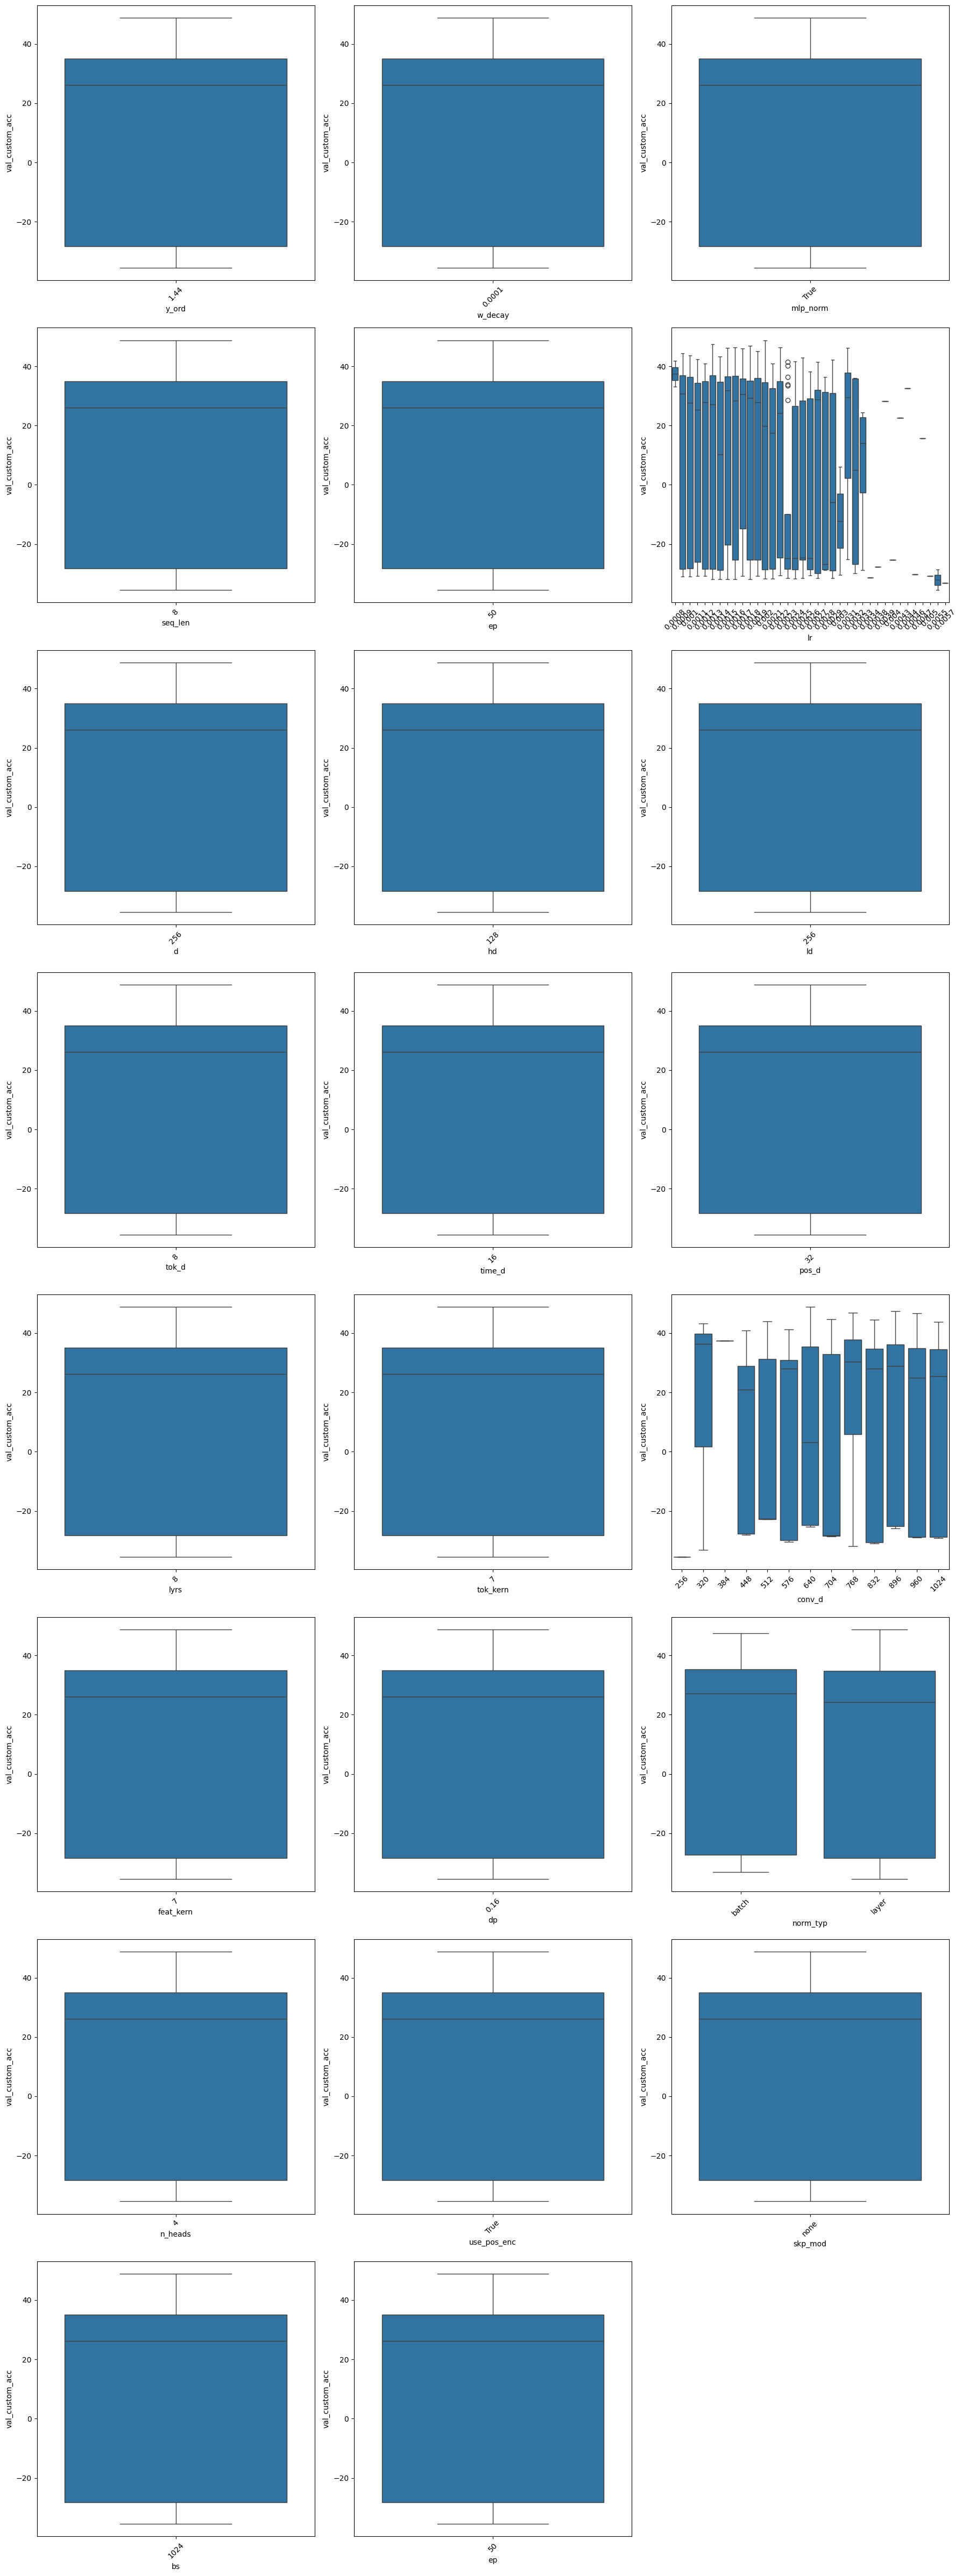

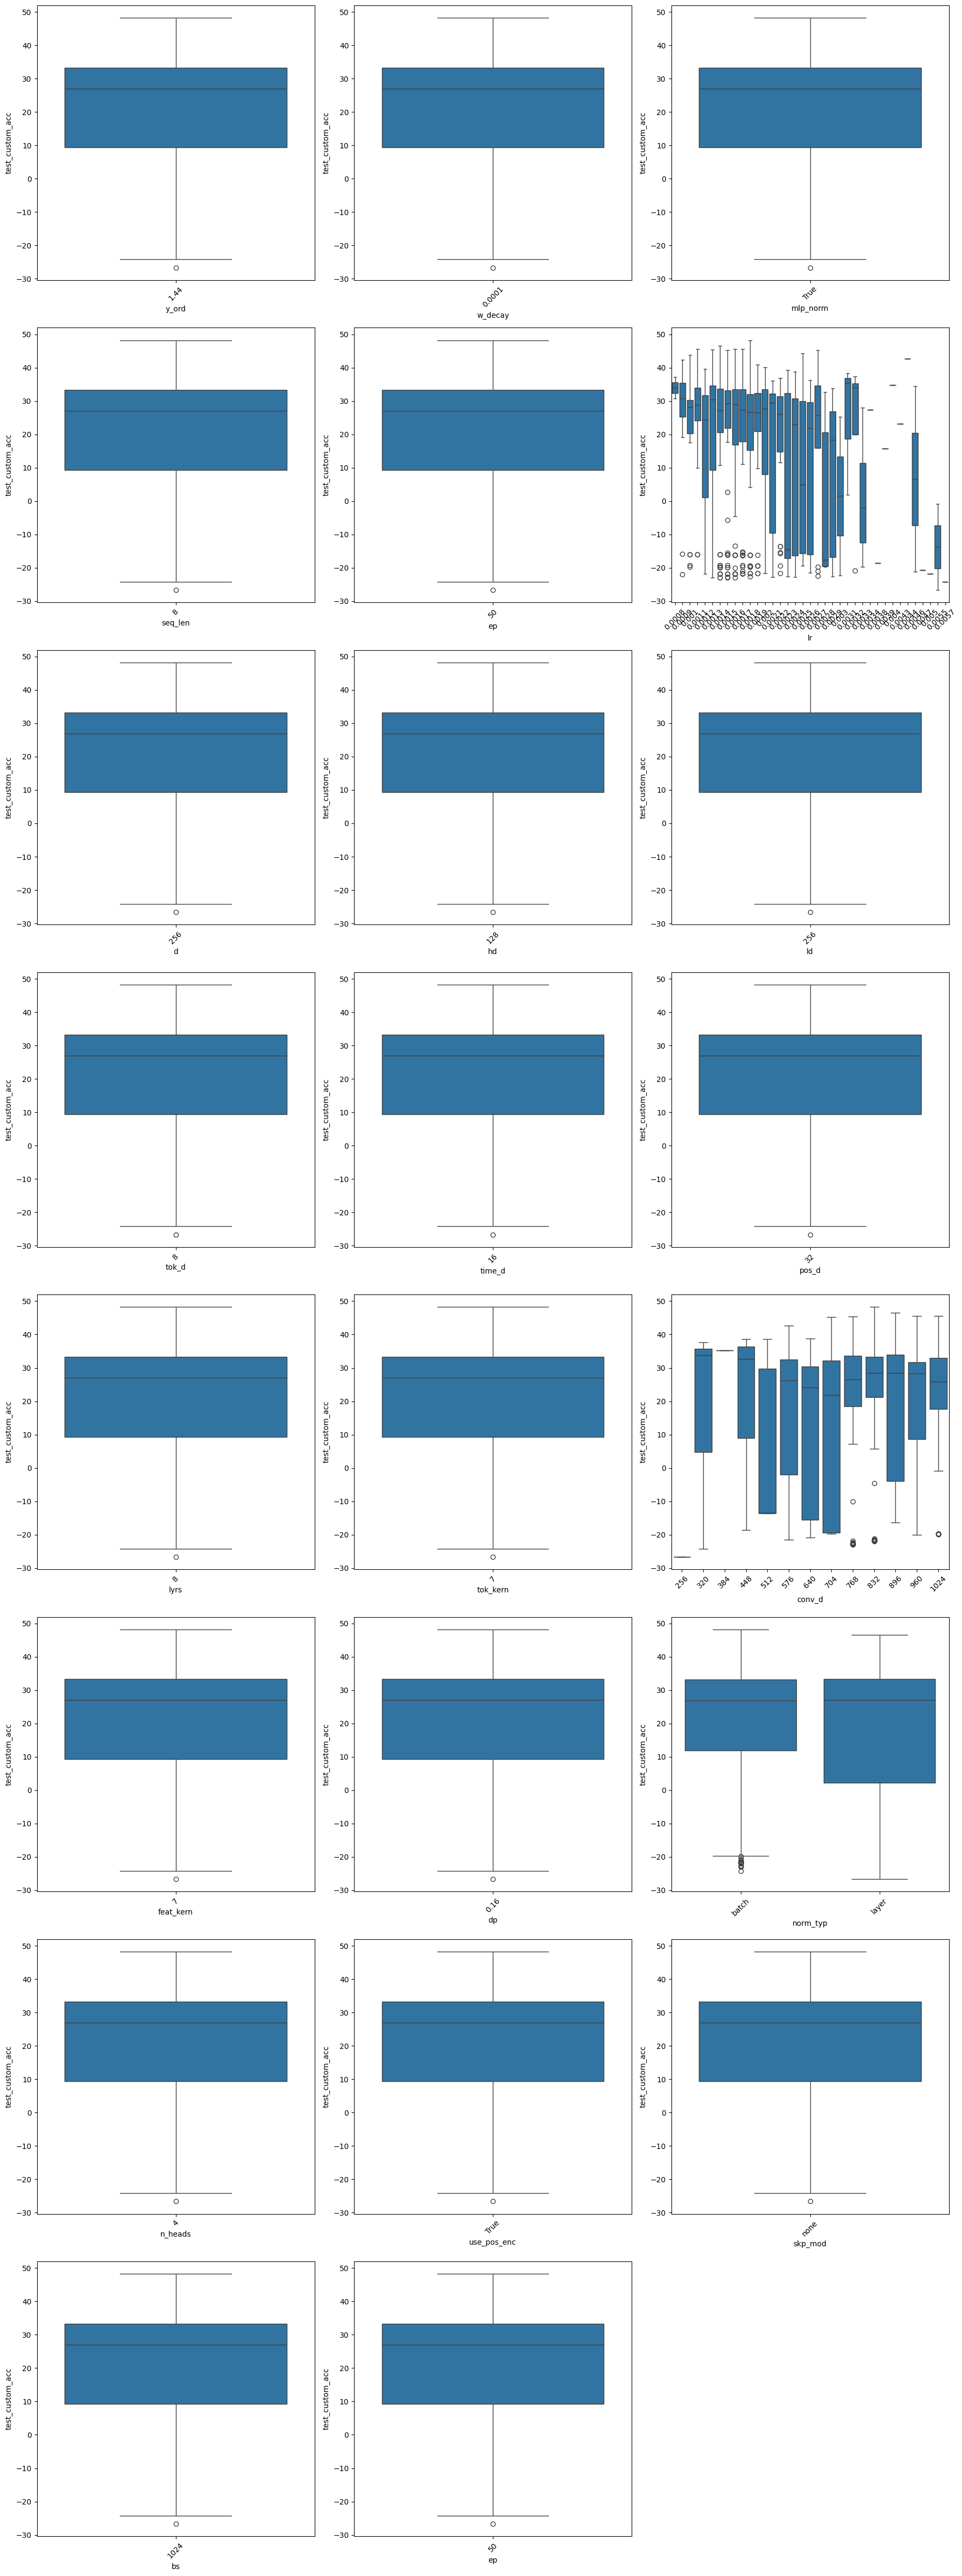

In [22]:
plot_features = [
    "y_ord",  # y_transformed_order
    "w_decay",  # weight_decay
    "val_splt",  # val_split
    "mlp_norm",  # mlp_norm
    "seq_len",  # seq_len
    "ep",  # train_epochs
    "lr",  # learning_rate
    "d",  # d_model
    "hd",  # hidden_d_model
    "ld",  # last_d_model
    "tok_d",  # token_d_model
    "time_d",  # time_d_model
    "pos_d",  # pos_d_model
    "lyrs",  # e_layers
    "tok_kern",  # token_conv_kernel
    "conv_d",  # conv_out_dim
    "feat_kern",  # feat_conv_kernel
    "dp",  # dropout
    "norm_typ",  # norm_type
    "n_heads",  # num_heads
    "use_pos_enc",  # use_pos_enc
    "skp_mod",  # skip_connection_mode
    "bs",  # batch_size
    "ep",  # train_epochs (keeping this consistent with "ep" above)
]


# Check which features are in the DataFrame
available_features = [feature for feature in plot_features if feature in df.columns]

# Print the available features
print("Available features to plot:", available_features)

# Now, you can plot the effects using the available features
plot_rmse_effects(df, x=available_features)

In [23]:
# Calculate the sum of rmse values for each row

df["sum_rmse"] = 0 * df["train_rmse"] + 0.4 * df["val_rmse"] + 0.4 * df["test_rmse"]

# Sort the rows based on the sum of rmse values
sorted_df = df.sort_values(by="sum_rmse", ascending=True)


In [24]:
sorted_df.columns

Index(['exp_date', 'train_rmse', 'train_custom_acc', 'val_rmse_for_best_train',
       'val_custom_acc_for_best_train', 'test_rmse_for_best_train',
       'test_custom_acc_for_best_train', 'train_epoch_for_best_train',
       'val_rmse', 'val_custom_acc', 'train_rmse_for_best_val',
       'train_custom_acc_for_best_val', 'test_rmse_for_best_val',
       'test_custom_acc_for_best_val', 'val_epoch_for_best_val', 'test_rmse',
       'test_custom_acc', 'train_rmse_for_best_test',
       'train_custom_acc_for_best_test', 'val_rmse_for_best_test',
       'val_custom_acc_for_best_test', 'test_epoch_for_best_test', 'v_splt',
       'y_ord', 'd', 'hd', 'ld', 'tok_d', 'time_d', 'pos_d', 'lyrs', 'n_heads',
       'conv_d', 'tok_kern', 'feat_kern', 'norm_typ', 'skp_mod', 'use_pos_enc',
       'seq_len', 'mlp_norm', 'ep', 'bs', 'lr', 'dp', 'w_decay', 'sum_rmse'],
      dtype='object')

In [25]:
selected_cols = [
    "train_rmse",
    "train_custom_acc",
    "val_rmse",
    "val_custom_acc",
    "test_rmse_for_best_val",
    "test_rmse",
    "test_custom_acc",
    "val_custom_acc_for_best_test",
]
sorted_df[selected_cols].head(10)

,train_rmse,train_custom_acc,val_rmse,val_custom_acc,test_rmse_for_best_val,test_rmse,test_custom_acc,val_custom_acc_for_best_test
576,10545.827462,86.411324,67790.525046,22.212076,86859.988668,66835.082354,28.076315,24.947721
206,8547.981476,89.638260,66884.104756,33.910263,68836.004349,68557.332608,30.438644,34.797581
336,11263.266562,86.568375,66178.262458,30.852449,72400.468316,69577.805471,26.741451,43.979843
329,11027.806003,86.369072,65776.917695,44.039146,72741.288087,70162.625997,29.977776,40.793003
599,12951.401844,82.977097,67760.120426,33.064262,69600.914363,68258.274522,32.960243,33.127068
171,10451.685655,87.426720,68952.685280,33.087700,67468.643866,67126.203985,25.050200,29.230648
339,10914.844088,87.623558,68479.962968,27.943676,70884.463698,67877.604679,26.518744,22.686518
153,9680.420473,88.482277,68359.295740,42.163986,69358.011085,68052.836209,35.404690,45.093365
719,11990.366502,85.278625,66206.900936,34.869991,70208.499215,70208.499215,23.950159,34.869991
352,12283.846174,84.199799,66617.251463,33.302361,74966.635707,70067.422356,35.909515,30.325377


In [26]:
# Print the top rows with the minimal sum of rmse
top_n = 10  # Number of top rows to print


# Drop the specified columns
columns_to_drop = [
    # "train_custom_acc_for_best_val",
    # "train_custom_acc",
    # "val_custom_acc",
    # "test_custom_acc",
    # "train_custom_acc_for_best_test",
    # "val_custom_acc_for_best_train",
    # "val_custom_acc_for_best_test",
    # "test_custom_acc_for_best_train",
    # "test_custom_acc_for_best_val",
]

output = sorted_df.head(top_n).drop(columns=columns_to_drop)


In [27]:
# print last few columns
print(output.iloc[:, -22:])

       d   hd   ld  tok_d  time_d  pos_d  lyrs  n_heads  conv_d  tok_kern  \
576  256  128  256      8      16     32     8        4     640         7   
206  256  128  256      8      16     32     8        4    1024         7   
336  256  128  256      8      16     32     8        4     832         7   
329  256  128  256      8      16     32     8        4     512         7   
599  256  128  256      8      16     32     8        4     576         7   
171  256  128  256      8      16     32     8        4     832         7   
339  256  128  256      8      16     32     8        4     576         7   
153  256  128  256      8      16     32     8        4     832         7   
719  256  128  256      8      16     32     8        4     768         7   
352  256  128  256      8      16     32     8        4     832         7   

     ...  skp_mod use_pos_enc seq_len  mlp_norm  ep    bs      lr    dp  \
576  ...     none        True       8      True  50  1024  0.0033  0.16   
20